In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [68]:
with open('/home/ahojel/visual_prompting_vid/output_dir/abalate_heads/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [69]:
# Create a DataFrame
df = pd.DataFrame(data2)

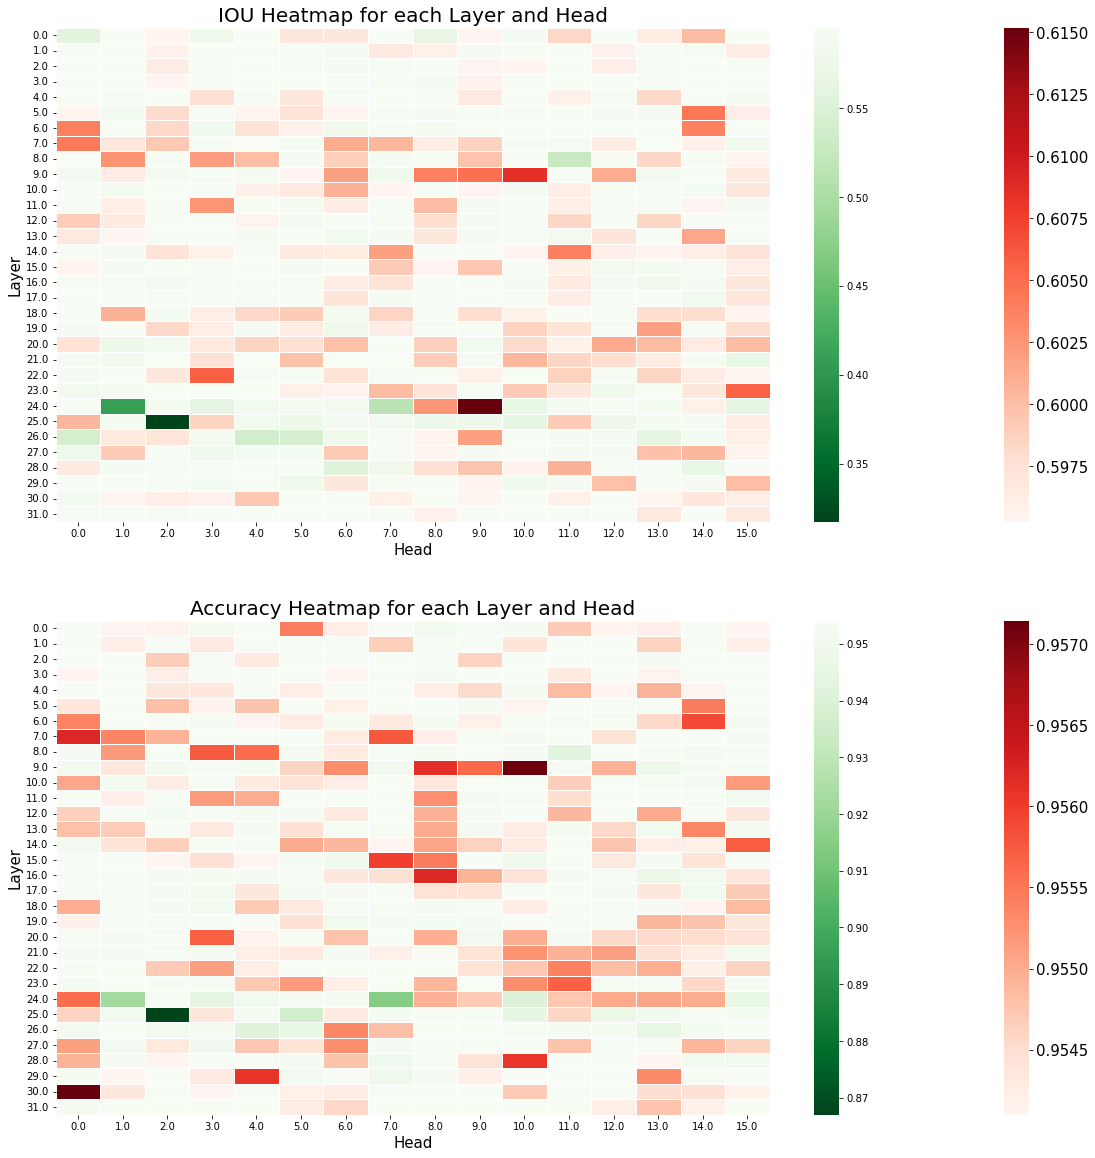

In [71]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layer','head'])['iou'].mean().reset_index()
grouped_df_accuracy = model_df.groupby(['layer','head'])['accuracy'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer' and 'head'
heatmap_data_iou = grouped_df_iou.pivot(index='layer', columns='head', values='iou')
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer', columns='head', values='accuracy')

# Create a mask for values below the baseline
mask_iou = heatmap_data_iou < baseline_iou
mask_accuracy = heatmap_data_accuracy < baseline_accuracy

# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot the heatmap with mask for IOU
sns.heatmap(heatmap_data_iou, cmap='Reds', mask=mask_iou, linewidths=0.5, ax=axs[0])
sns.heatmap(heatmap_data_iou, cmap='Greens_r', mask=~mask_iou, linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)

# Plot the heatmap with mask for accuracy
sns.heatmap(heatmap_data_accuracy, cmap='Reds', mask=mask_accuracy, linewidths=0.5, ax=axs[1])
sns.heatmap(heatmap_data_accuracy, cmap='Greens_r', mask=~mask_accuracy, linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)



In [86]:
with open('/home/ahojel/visual_prompting_vid/output_dir/abalate_heads_2/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [87]:
# Create a DataFrame
df = pd.DataFrame(data2)

In [88]:
df

,query_name,support_name,baseline,task,metric,iou,accuracy,layer,head
0,2007_000033,2011_001114,True,segmentation,1.623007,0.476555,0.905771,NaN,NaN
1,2007_000033,2011_001114,False,segmentation,1.583483,0.484808,0.906420,0.0,0.0
2,2007_000033,2011_001114,False,segmentation,1.623007,0.476555,0.905771,0.0,1.0
3,2007_000033,2011_001114,False,segmentation,1.623007,0.476555,0.905771,0.0,2.0
4,2007_000033,2011_001114,False,segmentation,1.607184,0.489741,0.907150,0.0,3.0
...,...,...,...,...,...,...,...,...,...
1254336,2010_003418,2010_004556,False,colorization,0.236624,NaN,NaN,3.0,2.0
1254337,2010_003418,2010_004556,False,colorization,0.236280,NaN,NaN,3.0,3.0
1254338,2010_003418,2010_004556,False,colorization,0.235495,NaN,NaN,3.0,4.0
1254339,2010_003418,2010_004556,False,colorization,0.238113,NaN,NaN,3.0,5.0


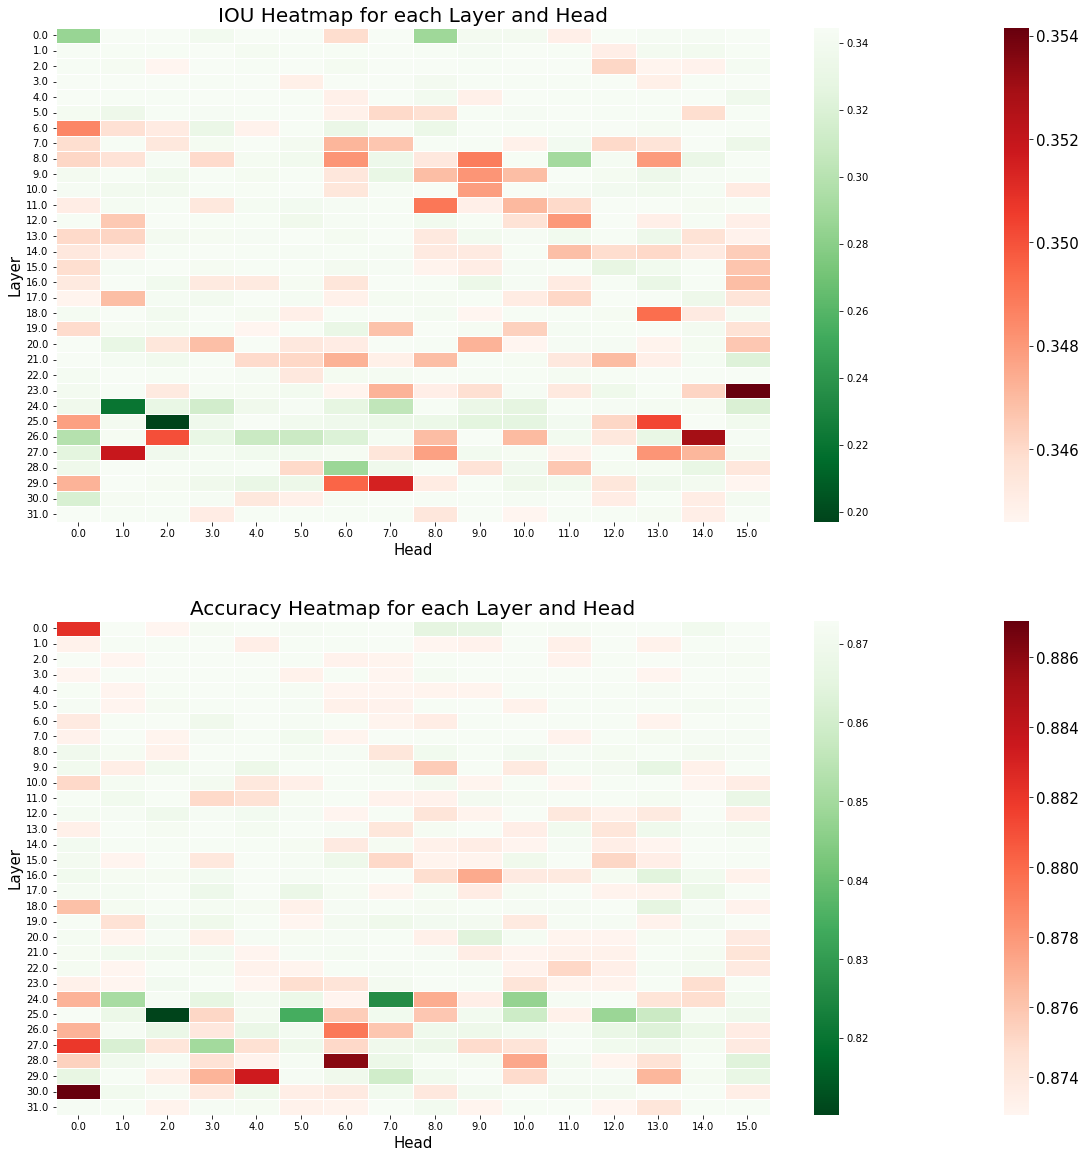

In [89]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layer','head'])['iou'].mean().reset_index()
grouped_df_accuracy = model_df.groupby(['layer','head'])['accuracy'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer' and 'head'
heatmap_data_iou = grouped_df_iou.pivot(index='layer', columns='head', values='iou')
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer', columns='head', values='accuracy')

# Create a mask for values below the baseline
mask_iou = heatmap_data_iou < baseline_iou
mask_accuracy = heatmap_data_accuracy < baseline_accuracy

# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot the heatmap with mask for IOU
sns.heatmap(heatmap_data_iou, cmap='Reds', mask=mask_iou, linewidths=0.5, ax=axs[0])
sns.heatmap(heatmap_data_iou, cmap='Greens_r', mask=~mask_iou, linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)

# Plot the heatmap with mask for accuracy
sns.heatmap(heatmap_data_accuracy, cmap='Reds', mask=mask_accuracy, linewidths=0.5, ax=axs[1])
sns.heatmap(heatmap_data_accuracy, cmap='Greens_r', mask=~mask_accuracy, linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)



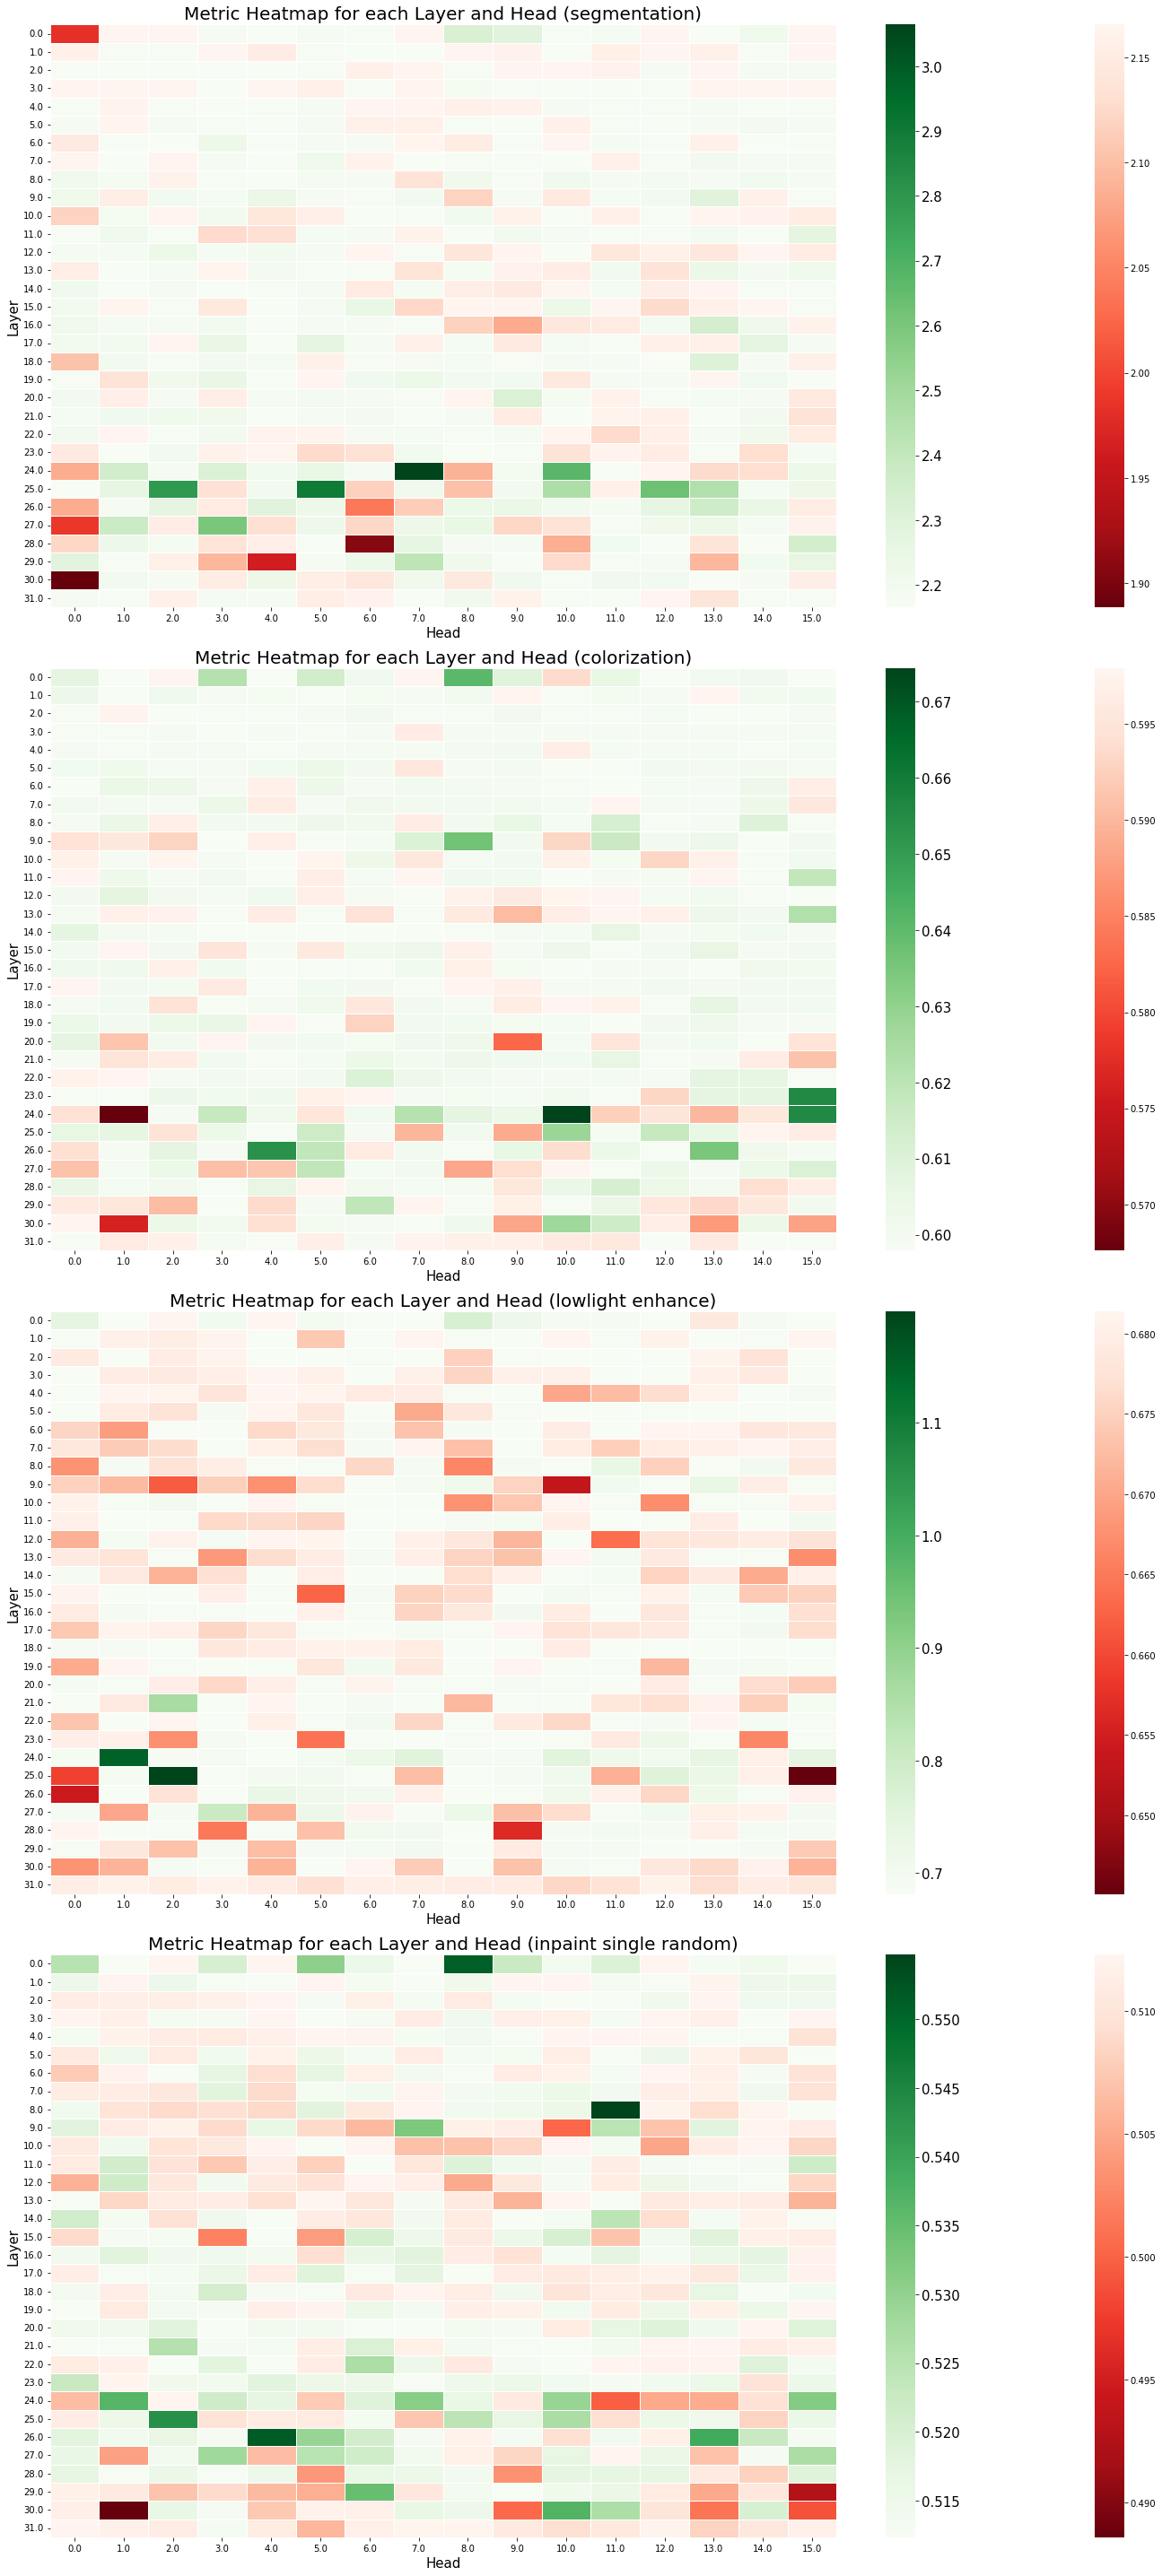

In [90]:
tasks = ['segmentation', 'colorization', 'lowlight enhance', 'inpaint single random']

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])['metric'].mean().reset_index()

    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = grouped_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    mask = heatmap_data > baseline

    # Plot the heatmap with mask
    sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='Greens', mask=~mask, linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'Metric Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


In [ ]:
tasks = ['segmentation', 'colorization', 'lowlight enhance', 'inpaint single random']

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])['metric'].mean().reset_index()

    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = grouped_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    mask = heatmap_data > baseline

    # Plot the heatmap with mask
    sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='Greens', mask=~mask, linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'Metric Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


In [100]:
grouped_df

In [103]:
task_df = df[df["task"] == "segmentation"]
model_df = task_df[task_df["baseline"]=="False"]

# Create a new DataFrame with columns 'layer', 'head', 'omitted_iou', and 'omitted_accuracy'
# Initialize an empty list to store the data
data = []

# Group the DataFrame by 'layer' and 'head'
grouped_df = model_df.groupby(['layer','head'])

# Iterate over each group
for (layer, head), group in grouped_df:
    # Calculate the mean 'iou' and 'accuracy' for the current group
    mean_iou = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['iou'].mean()
    
    # Append the data to the list
    data.append({'layer': layer, 'head': head, 'omitted_iou': mean_iou})

# Convert the list to a DataFrame
new_df = pd.DataFrame(data)

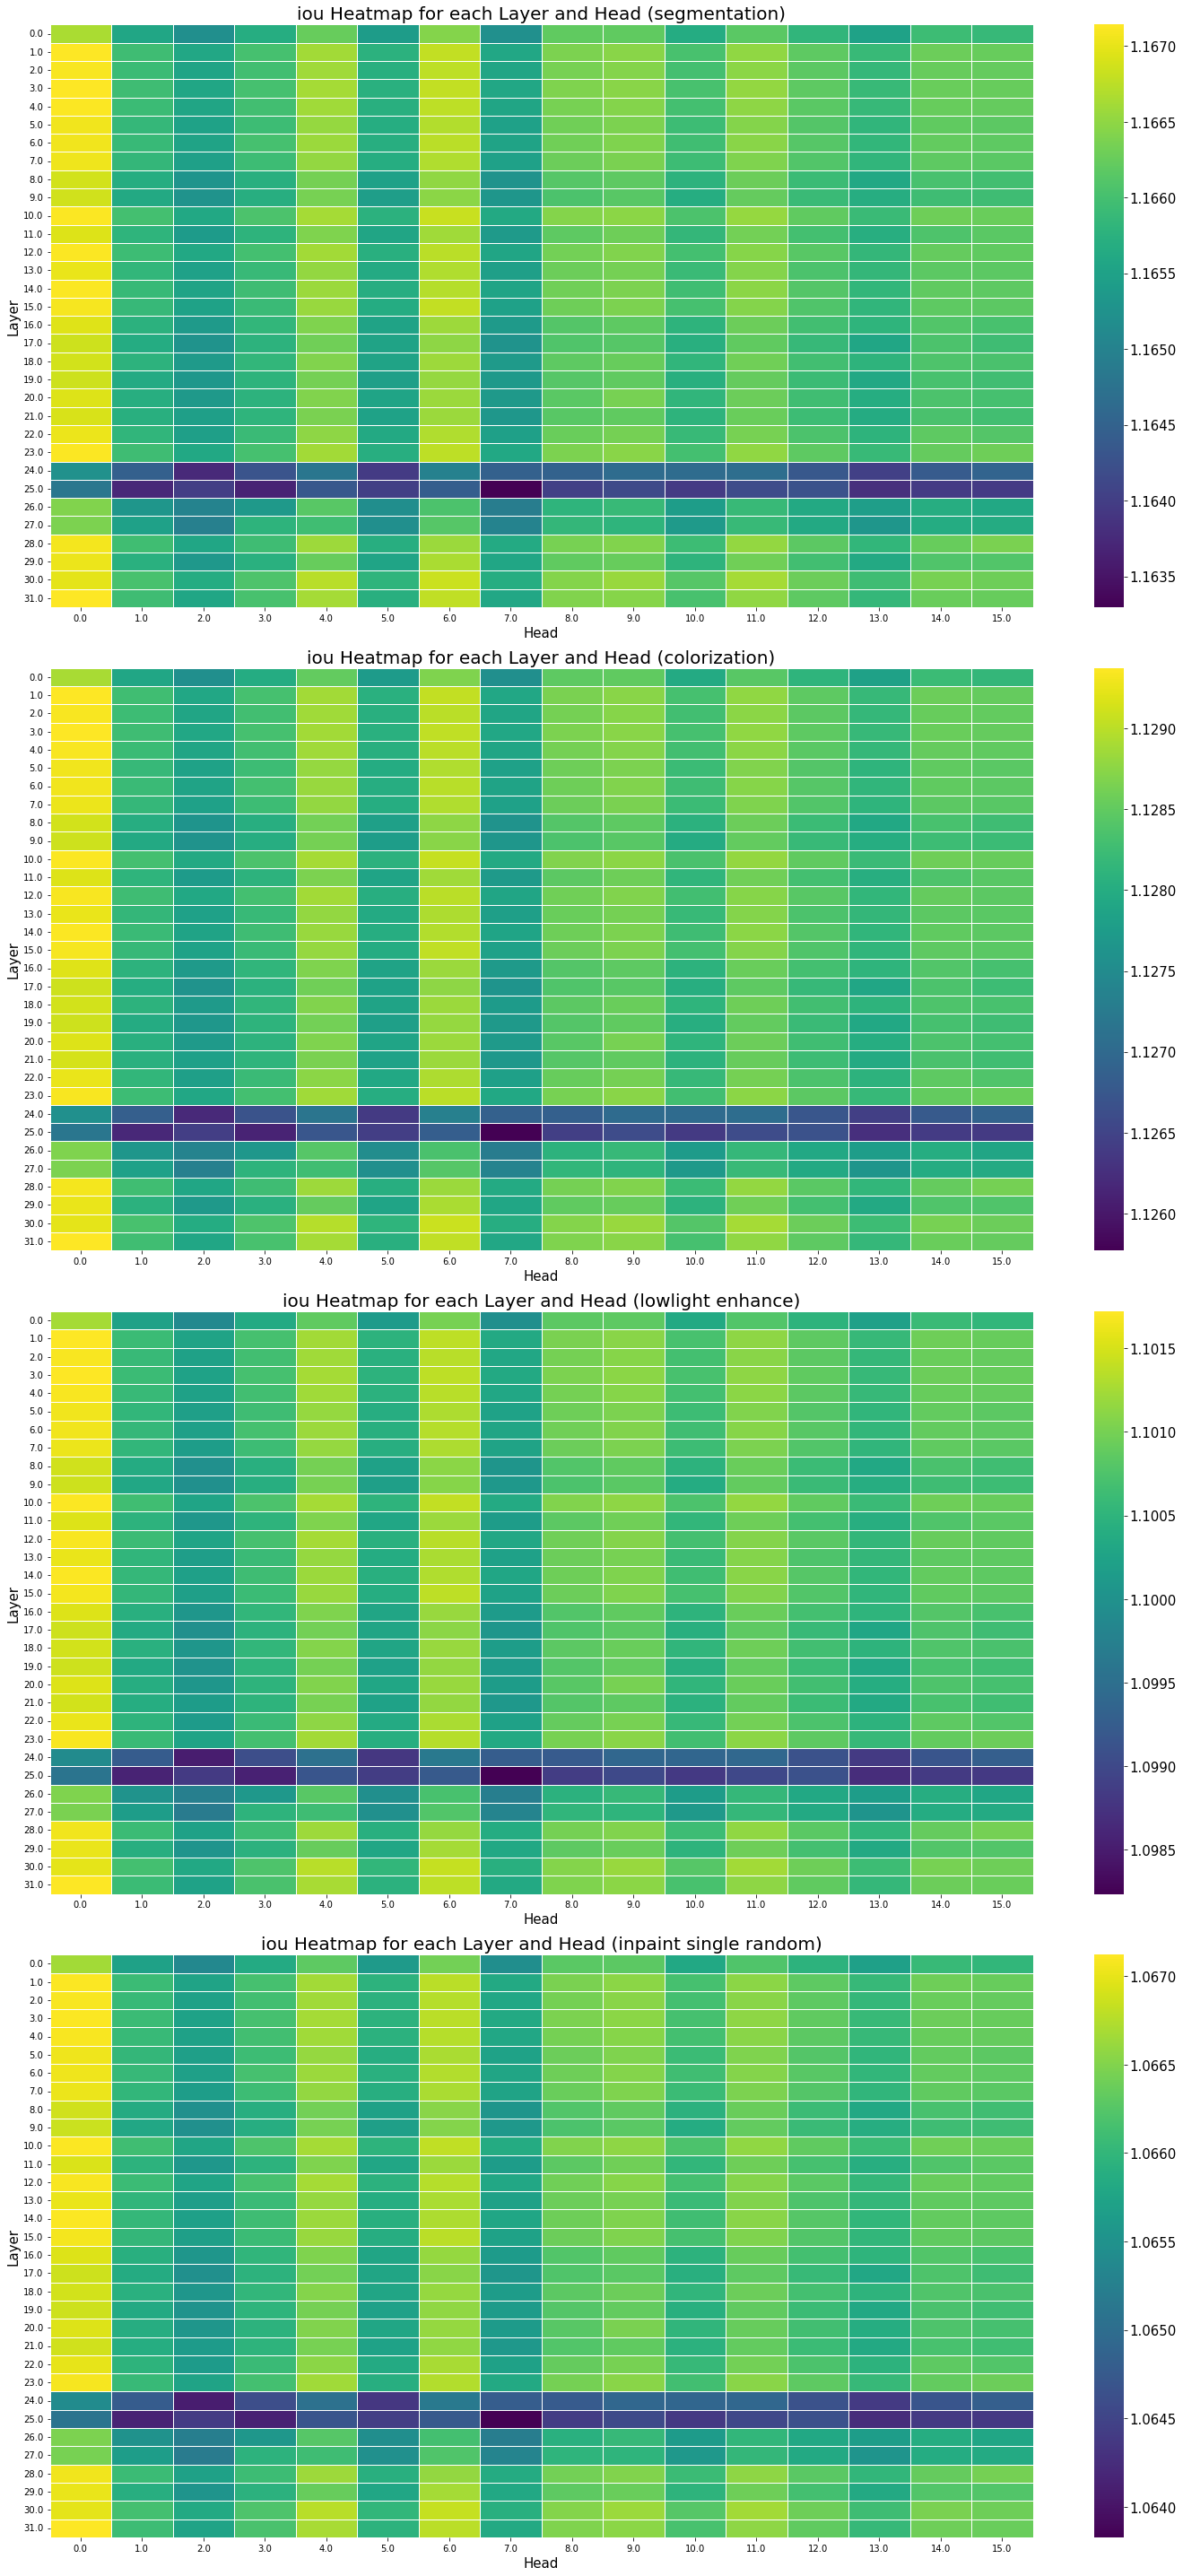

In [120]:
tasks = ['segmentation',"colorization","lowlight enhance","inpaint single random"]

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])

    for (layer, head), group in grouped_df:
        # Calculate the mean 'iou' and 'accuracy' for the current group
        metric = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['metric'].mean()
        
        # Append the data to the list
        data.append({'layer': layer, 'head': head, 'metric': metric})

    # Convert the list to a DataFrame
    new_df = pd.DataFrame(data)

    new_df = new_df.groupby(['layer','head'])['metric'].mean().reset_index()


    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = new_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    #mask = heatmap_data > baseline

    # Plot the heatmap with mask
    #sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'iou Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


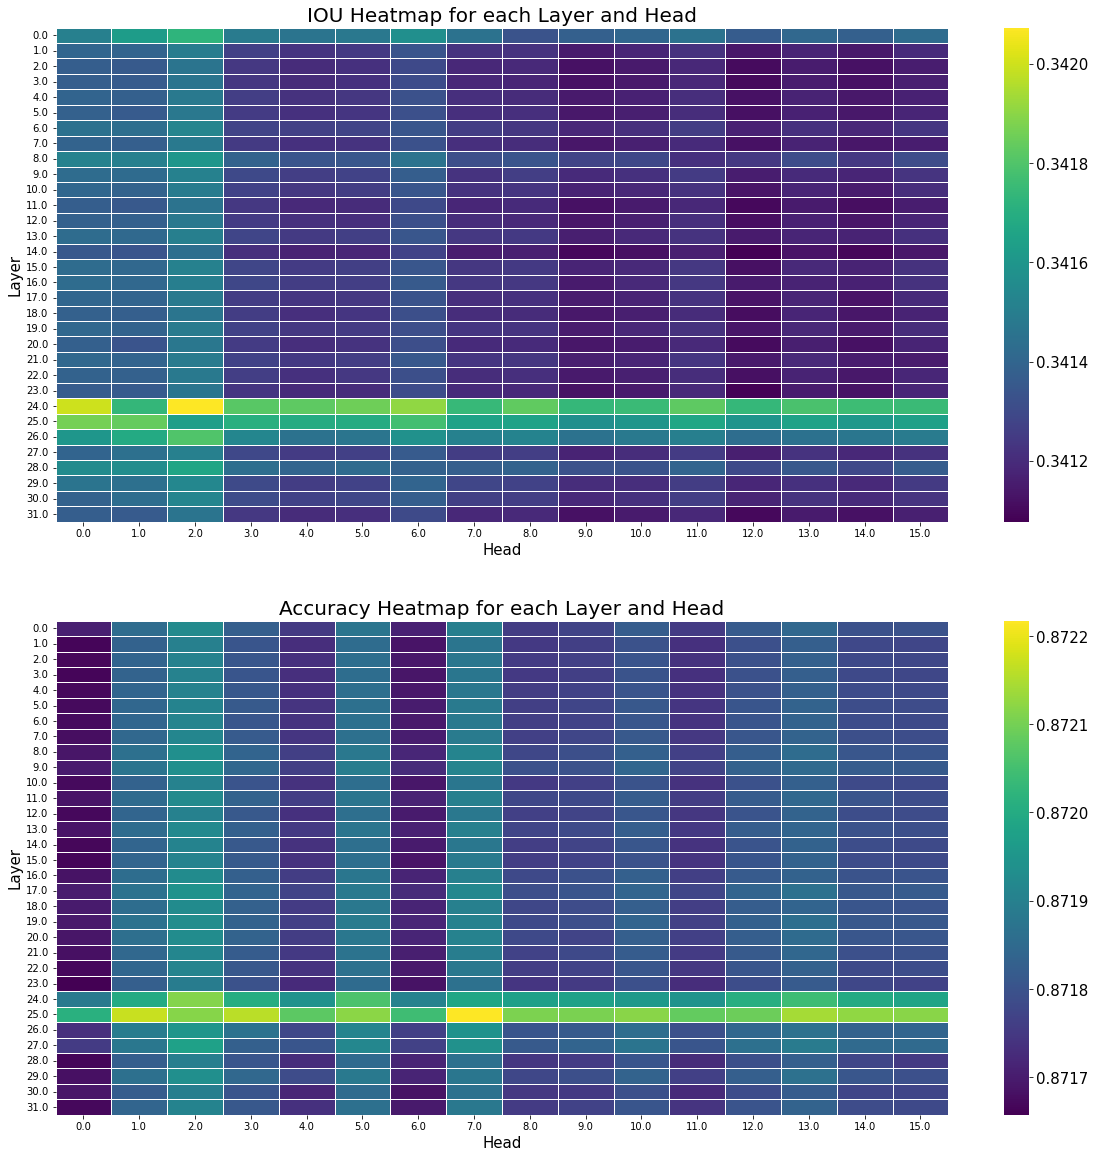

In [119]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()


grouped_df = model_df.groupby(['layer','head'])

for (layer, head), group in grouped_df:
    # Calculate the mean 'iou' and 'accuracy' for the current group
    acc = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['accuracy'].mean()
    iou = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['iou'].mean()
    
    # Append the data to the list
    data.append({'layer': layer, 'head': head, 'iou': iou, "accuracy":acc})

# Convert the list to a DataFrame
new_df = pd.DataFrame(data)

model_df = new_df

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layer','head'])['iou'].mean().reset_index()
grouped_df_accuracy = model_df.groupby(['layer','head'])['accuracy'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer' and 'head'
heatmap_data_iou = grouped_df_iou.pivot(index='layer', columns='head', values='iou')
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer', columns='head', values='accuracy')
# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

sns.heatmap(heatmap_data_iou, cmap='viridis', linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)
sns.heatmap(heatmap_data_accuracy, cmap='viridis', linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)


